In [188]:
import numpy as np
import os
import csv
import pandas as pd
import pandas as pd
from sklearn import preprocessing


In [205]:


def normalize(df):
    result = df.copy()
    for feature_name in df.columns:
        if feature_name in ll:
            max_value = df[feature_name].max()
            min_value = df[feature_name].min()
            result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result


def features_extraction(time_frame,csv_read_path, csv_save_path, rows,type_features, types, stat):
    i = 0
    arr = []

    for filename in rows:
        i = i+1
        df = pd.read_csv(csv_read_path+filename[0]+'_video.csv', index_col=None, header=0)
        df = df[features]
        df = df.iloc[-time_frame:]
        
# **************** add different feature names to extract the data from openface, opensmile or openpose **********************

        if type_features == 'gaze_only':
        
            if stat == 'mean_diff':
        
                gaze_cols = [' gaze_0_x',' gaze_0_y',' gaze_0_z',' gaze_1_x',' gaze_1_y',' gaze_1_z',' gaze_angle_x',' gaze_angle_y']
                gaze_diffmean = (df[gaze_cols]-df[gaze_cols].shift()).abs().mean()
                gaze_diffmean.index = ['GAZEDIFF_'+x for x in gaze_diffmean.index]

                df = pd.DataFrame() 
                gaze_length = len(gaze_diffmean.index)

                for gaze_l in range(gaze_length):

                     df[gaze_diffmean.index[gaze_l]] = [gaze_diffmean[gaze_l]]
             
            if stat == 'sd_diff':
                    
                gaze_cols = [' gaze_0_x',' gaze_0_y',' gaze_0_z',' gaze_1_x',' gaze_1_y',' gaze_1_z',' gaze_angle_x',' gaze_angle_y']
                gaze_diffsd = (df[gaze_cols]-df[gaze_cols].shift()).abs().std()
                gaze_diffsd.index = ['GAZEDIFF_'+x for x in gaze_diffsd.index]

                df = pd.DataFrame() 
                gaze_length = len(gaze_diffsd.index)

                for gaze_l in range(gaze_length):

                     df[gaze_diffsd.index[gaze_l]] = [gaze_diffsd[gaze_l]]
                       
            if stat == 'median_diff':
                    
                gaze_cols = [' gaze_0_x',' gaze_0_y',' gaze_0_z',' gaze_1_x',' gaze_1_y',' gaze_1_z',' gaze_angle_x',' gaze_angle_y']
                gaze_diffmedian = (df[gaze_cols]-df[gaze_cols].shift()).abs().median()
                gaze_diffmedian.index = ['GAZEDIFF_'+x for x in gaze_diffmedian.index]

                df = pd.DataFrame() 
                gaze_length = len(gaze_diffmedian.index)

                for gaze_l in range(gaze_length):

                     df[gaze_diffmedian.index[gaze_l]] = [gaze_diffmedian[gaze_l]]        
                        
                    
        if type_features == 'au_only':          
            
        
            au_cols = [' AU01_r', ' AU02_r',' AU04_r',' AU05_r', ' AU06_r',' AU07_r',' AU09_r',' AU10_r',' AU12_r',' AU14_r',' AU15_r',' AU17_r',' AU20_r',' AU23_r', ' AU25_r',' AU26_r', ' AU45_r']
            

            
            if stat == 'mean_diff':
                
                aus_mean = df[au_cols].mean()
                aus_mean.index = ['AUSRMEAN_'+x for x in aus_mean.index]

                aus_diffmean = (df[au_cols]-df[au_cols].shift()).abs().mean()
                aus_diffmean.index = ['AUSRDIFF_'+x for x in aus_diffmean.index]

                aus_length = len(aus_mean.index)

                df = pd.DataFrame()

                for aus_l in range(aus_length):

                    df[aus_mean.index[aus_l]] = [aus_mean[aus_l]]


                    df[aus_diffmean.index[aus_l]] = [aus_diffmean[aus_l]]
                    
            if  stat == 'sd_diff':
                
                aus_mean = df[au_cols].mean()
                aus_mean.index = ['AUSRMEAN_'+x for x in aus_mean.index]

                aus_diffsd = (df[au_cols]-df[au_cols].shift()).abs().std()
                aus_diffsd.index = ['AUSRDIFF_'+x for x in aus_diffsd.index]

                aus_length = len(aus_mean.index)

                df = pd.DataFrame()

                for aus_l in range(aus_length):

                    df[aus_mean.index[aus_l]] = [aus_mean[aus_l]]


                    df[aus_diffsd.index[aus_l]] = [aus_diffsd[aus_l]]
                    
            if  stat == 'median_diff':
                
                aus_mean = df[au_cols].mean()
                aus_mean.index = ['AUSRMEAN_'+x for x in aus_mean.index]

                aus_diffmedian = (df[au_cols]-df[au_cols].shift()).abs().medain()
                aus_diffmedian.index = ['AUSRDIFF_'+x for x in aus_diffmedian.index]

                aus_length = len(aus_mean.index)

                df = pd.DataFrame()

                for aus_l in range(aus_length):

                    df[aus_mean.index[aus_l]] = [aus_mean[aus_l]]


                    df[aus_diffmedian.index[aus_l]] = [aus_diffmedian[aus_l]]       
                
        if type_features == 'pose_only': 
            
                if stat == 'mean_diff':
             
                    head_cols = [' pose_Tx',' pose_Ty',' pose_Tz',' pose_Rx',' pose_Ry',' pose_Rz']
                    #head_cols = [' pose_Tx',' pose_Ty',' pose_Ry']
                    head_diffmean = (df[head_cols]- df[head_cols].shift()).abs().mean()
                    head_diffmean.index = ['HEADDIFF_'+x for x in head_diffmean.index]

                    head_length = len(head_diffmean.index)

                    df = pd.DataFrame()
                    for head_l in range(head_length):

                        df[head_diffmean.index[head_l]] = [head_diffmean[head_l]]
                
                if stat == 'sd_diff':
             
                    head_cols = [' pose_Tx',' pose_Ty',' pose_Tz',' pose_Rx',' pose_Ry',' pose_Rz']
                    #head_cols = [' pose_Tx',' pose_Ty',' pose_Ry']
                    head_diffsd = (df[head_cols]- df[head_cols].shift()).abs().std()
                    head_diffsd.index = ['HEADDIFF_'+x for x in head_diffsd.index]

                    head_length = len(head_diffsd.index)

                    df = pd.DataFrame()
                    for head_l in range(head_length):

                        df[head_diffsd.index[head_l]] = [head_diffsd[head_l]] 
                    
                if stat == 'median_diff':
             
                    head_cols = [' pose_Tx',' pose_Ty',' pose_Tz',' pose_Rx',' pose_Ry',' pose_Rz']
                    #head_cols = [' pose_Tx',' pose_Ty',' pose_Ry']
                    head_diffmedian = (df[head_cols]- df[head_cols].shift()).abs().median()
                    head_diffmedian.index = ['HEADDIFF_'+x for x in head_diffmedian.index]

                    head_length = len(head_diffmedian.index)

                    df = pd.DataFrame()
                    
                    for head_l in range(head_length):

                        df[head_diffmedian.index[head_l]] = [head_diffmedian[head_l]]    
                    
        if type_features == 'pose_gaze': 
            
                if stat == 'mean_diff':
                    
                    head_cols = [' pose_Tx',' pose_Ty',' pose_Tz',' pose_Rx',' pose_Ry',' pose_Rz']
                    head_diffmean = 0
                    for val in range(18):
                        
                       head_diffmean = df[head_cols][5*val:5*val+5].sum() - head_diffmean
                    
                    head_diffmean = abs(head_diffmean/18)
                    
            
                    
                    #head_cols = [' pose_Tx',' pose_Ty',' pose_Ry']
                    #head_diffmean = (df[head_cols]-df[head_cols].shift()).abs().mean()
                    head_diffmean.index = ['HEADDIFF_'+x for x in head_diffmean.index]
                    head_length = len(head_diffmean.index)

                    gaze_cols = [' gaze_0_x',' gaze_0_y',' gaze_0_z',' gaze_1_x',' gaze_1_y',' gaze_1_z',' gaze_angle_x',' gaze_angle_y']
                    
                    
                    #gaze_diffmean = (df[gaze_cols]-df[gaze_cols].shift()).abs().mean()
                    
                    gaze_diffmean = 0
                    
                    for val in range(18):
                       gaze_diffmean = df[gaze_cols][5*val:5*val+5].sum() - gaze_diffmean
                    
                    gaze_diffmean = abs(gaze_diffmean/18)
                    
                    gaze_diffmean.index = ['GAZEDIFF_'+x for x in gaze_diffmean.index]

                    df = pd.DataFrame() 
                    gaze_length = len(gaze_diffmean.index)
                    head_length = len(head_diffmean.index)

                    for gaze_l in range(gaze_length):

                        df[gaze_diffmean.index[gaze_l]] = [gaze_diffmean[gaze_l]]

                    for head_l in range(head_length):

                        df[head_diffmean.index[head_l]] = [head_diffmean[head_l]] 
                        
                if stat == 'max_diff':
            
                    head_cols = [' pose_Tx',' pose_Ty',' pose_Tz',' pose_Rx',' pose_Ry',' pose_Rz']
                    #head_cols = [' pose_Tx',' pose_Ty',' pose_Ry']
                    head_diffmax = (df[head_cols]-df[head_cols].shift()).abs().max()
                    head_diffmax.index = ['HEADDIFF_'+x for x in head_diffmax.index]
                    head_length = len(head_diffmax.index)

                    gaze_cols = [' gaze_0_x',' gaze_0_y',' gaze_0_z',' gaze_1_x',' gaze_1_y',' gaze_1_z',' gaze_angle_x',' gaze_angle_y']
                    gaze_diffmax = (df[gaze_cols]-df[gaze_cols].shift()).abs().max()
                    gaze_diffmax.index = ['GAZEDIFF_'+x for x in gaze_diffmax.index]

                    df = pd.DataFrame() 
                    gaze_length = len(gaze_diffmax.index)
                    head_length = len(head_diffmax.index)

                    for gaze_l in range(gaze_length):

                        df[gaze_diffmax.index[gaze_l]] = [gaze_diffmax[gaze_l]]

                    for head_l in range(head_length):

                        df[head_diffmax.index[head_l]] = [head_diffmax[head_l]]        
            
                if stat == 'sd_diff':
            
                    head_cols = [' pose_Tx',' pose_Ty',' pose_Tz',' pose_Rx',' pose_Ry',' pose_Rz']
                    #head_cols = [' pose_Tx',' pose_Ty',' pose_Ry']
                    head_diffsd = (df[head_cols]-df[head_cols].shift()).abs().std()
                    head_diffsd.index = ['HEADDIFF_'+x for x in head_diffsd.index]
                    head_length = len(head_diffsd.index)

                    gaze_cols = [' gaze_0_x',' gaze_0_y',' gaze_0_z',' gaze_1_x',' gaze_1_y',' gaze_1_z',' gaze_angle_x',' gaze_angle_y']
                    gaze_diffsd = (df[gaze_cols]-df[gaze_cols].shift()).abs().std()
                    gaze_diffsd.index = ['GAZEDIFF_'+x for x in gaze_diffsd.index]

                    df = pd.DataFrame() 
                    gaze_length = len(gaze_diffsd.index)
                    head_length = len(head_diffsd.index)

                    for gaze_l in range(gaze_length):

                        df[gaze_diffsd.index[gaze_l]] = [gaze_diffsd[gaze_l]]

                    for head_l in range(head_length):

                        df[head_diffsd.index[head_l]] = [head_diffsd[head_l]]
                        
                     
                if stat == 'median_diff':
            
                    head_cols = [' pose_Tx',' pose_Ty',' pose_Tz',' pose_Rx',' pose_Ry',' pose_Rz']
                    #head_cols = [' pose_Tx',' pose_Ty',' pose_Ry']
                    
                    head_diffmean = (df[head_cols]-df[head_cols].shift()).abs().mean()
                    head_diffmean.index = ['HEADDIFFMEAN_'+x for x in head_diffmean.index]
                    
                
                    

                    gaze_cols = [' gaze_0_x',' gaze_0_y',' gaze_0_z',' gaze_1_x',' gaze_1_y',' gaze_1_z',' gaze_angle_x',' gaze_angle_y']
                    gaze_diffmean = (df[gaze_cols]-df[gaze_cols].shift()).abs().mean()
                    gaze_diffmean.index = ['GAZEDIFFMEAN_'+x for x in gaze_diffmean.index]
                    
                    head_diffmedian = (df[head_cols]-df[head_cols].shift()).abs().median()
                    head_diffmedian.index = ['HEADDIFFMEDIAN_'+x for x in head_diffmedian.index]
                    
                  

                    gaze_cols = [' gaze_0_x',' gaze_0_y',' gaze_0_z',' gaze_1_x',' gaze_1_y',' gaze_1_z',' gaze_angle_x',' gaze_angle_y']
                    gaze_diffmedian = (df[gaze_cols]-df[gaze_cols].shift()).abs().median()
                    gaze_diffmedian.index = ['GAZEDIFFMEDIAN_'+x for x in gaze_diffmedian.index]

                    df = pd.DataFrame() 
                    gaze_length = len(gaze_diffmedian.index)
                    head_length = len(head_diffmedian.index)

                    for gaze_l in range(gaze_length):

                        df[gaze_diffmedian.index[gaze_l]] = [gaze_diffmedian[gaze_l]]
                        
                        df[gaze_diffmean.index[gaze_l]] = [gaze_diffmean[gaze_l]]

                    for head_l in range(head_length):

                        df[head_diffmedian.index[head_l]] = [head_diffmedian[head_l]] 
                        
                        df[head_diffmean.index[head_l]] = [head_diffmean[head_l]] 
            
                
        if type_features == 'all': 
            
            if stat == 'mean_diff':
            
                gaze_cols = [' gaze_0_x',' gaze_0_y',' gaze_0_z',' gaze_1_x',' gaze_1_y',' gaze_1_z',' gaze_angle_x',' gaze_angle_y']

                au_cols = [' AU01_r', ' AU02_r',' AU04_r',' AU05_r', ' AU06_r',' AU07_r',' AU09_r',' AU10_r',' AU12_r',' AU14_r',' AU15_r',' AU17_r',' AU20_r',' AU23_r', ' AU25_r',' AU26_r', ' AU45_r']

                head_cols = [' pose_Tx',' pose_Ty',' pose_Tz',' pose_Rx',' pose_Ry',' pose_Rz']
                #head_cols = [' pose_Tx',' pose_Ty',' pose_Ry']
                gaze_diffmean = (df[gaze_cols]-df[gaze_cols].shift()).abs().mean()
                gaze_diffmean.index = ['GAZEDIFF_'+x for x in gaze_diffmean.index]



                aus_mean = df[au_cols].mean()
                aus_mean.index = ['AUSRMEAN_'+x for x in aus_mean.index]

                aus_diffmean = (df[au_cols]-df[au_cols].shift()).abs().mean()
                aus_diffmean.index = ['AUSRDIFF_'+x for x in aus_diffmean.index]

                head_diffmean = (df[head_cols]-df[head_cols].shift()).abs().mean()
                head_diffmean.index = ['HEADDIFF_'+x for x in head_diffmean.index] 

                df = pd.DataFrame()

                aus_length = len(aus_mean.index)
                gaze_length = len(gaze_diffmean.index)
                head_length = len(head_diffmean.index)

                for gaze_l in range(gaze_length):

                     df[gaze_diffmean.index[gaze_l]] = [gaze_diffmean[gaze_l]]

                for aus_l in range(aus_length):

                    df[aus_mean.index[aus_l]] = [aus_mean[aus_l]]


                    df[aus_diffmean.index[aus_l]] = [aus_diffmean[aus_l]] 




                for head_l in range(head_length):

                     df[head_diffmean.index[head_l]] = [head_diffmean[head_l]]
                        
                        
            if stat == 'sd_diff':
            
                gaze_cols = [' gaze_0_x',' gaze_0_y',' gaze_0_z',' gaze_1_x',' gaze_1_y',' gaze_1_z',' gaze_angle_x',' gaze_angle_y']

                au_cols = [' AU01_r', ' AU02_r',' AU04_r',' AU05_r', ' AU06_r',' AU07_r',' AU09_r',' AU10_r',' AU12_r',' AU14_r',' AU15_r',' AU17_r',' AU20_r',' AU23_r', ' AU25_r',' AU26_r', ' AU45_r']

                head_cols = [' pose_Tx',' pose_Ty',' pose_Tz',' pose_Rx',' pose_Ry',' pose_Rz']
                #head_cols = [' pose_Tx',' pose_Ty',' pose_Ry']
                gaze_diffsd = (df[gaze_cols]-df[gaze_cols].shift()).abs().std()
                gaze_diffsd.index = ['GAZEDIFF_'+x for x in gaze_diffsd.index]



                aus_mean = df[au_cols].mean()
                aus_mean.index = ['AUSRMEAN_'+x for x in aus_mean.index]

                aus_diffsd = (df[au_cols]-df[au_cols].shift()).abs().std()
                aus_diffsd.index = ['AUSRDIFF_'+x for x in aus_diffsd.index]

                head_diffsd = (df[head_cols]-df[head_cols].shift()).abs().std()
                head_diffsd.index = ['HEADDIFF_'+x for x in head_diffsd.index] 

                df = pd.DataFrame()

                aus_length = len(aus_mean.index)
                gaze_length = len(gaze_diffsd.index)
                head_length = len(head_diffsd.index)

                for gaze_l in range(gaze_length):

                     df[gaze_diffsd.index[gaze_l]] = [gaze_diffsd[gaze_l]]

                for aus_l in range(aus_length):

                    df[aus_mean.index[aus_l]] = [aus_mean[aus_l]]


                    df[aus_diffsd.index[aus_l]] = [aus_diffsd[aus_l]] 




                for head_l in range(head_length):

                     df[head_diffsd.index[head_l]] = [head_diffsd[head_l]]    
                        
                        
            if stat == 'median_diff':
            
                gaze_cols = [' gaze_0_x',' gaze_0_y',' gaze_0_z',' gaze_1_x',' gaze_1_y',' gaze_1_z',' gaze_angle_x',' gaze_angle_y']

                au_cols = [' AU01_r', ' AU02_r',' AU04_r',' AU05_r', ' AU06_r',' AU07_r',' AU09_r',' AU10_r',' AU12_r',' AU14_r',' AU15_r',' AU17_r',' AU20_r',' AU23_r', ' AU25_r',' AU26_r', ' AU45_r']

                head_cols = [' pose_Tx',' pose_Ty',' pose_Tz',' pose_Rx',' pose_Ry',' pose_Rz']
                #head_cols = [' pose_Tx',' pose_Ty',' pose_Ry']
                gaze_diffmedian = (df[gaze_cols]-df[gaze_cols].shift()).abs().median()
                gaze_diffmedian.index = ['GAZEDIFF_'+x for x in gaze_diffmedian.index]



                aus_mean = df[au_cols].mean()
                aus_mean.index = ['AUSRMEAN_'+x for x in aus_mean.index]

                aus_diffmedian = (df[au_cols]-df[au_cols].shift()).abs().median()
                aus_diffmedian.index = ['AUSRDIFF_'+x for x in aus_diffmedian.index]

                head_diffmedian = (df[head_cols]-df[head_cols].shift()).abs().median()
                head_diffmedian.index = ['HEADDIFF_'+x for x in head_diffmedian.index] 

                df = pd.DataFrame()

                aus_length = len(aus_mean.index)
                gaze_length = len(gaze_diffmedian.index)
                head_length = len(head_diffmedian.index)

                for gaze_l in range(gaze_length):

                     df[gaze_diffmedian.index[gaze_l]] = [gaze_diffmedian[gaze_l]]

                for aus_l in range(aus_length):

                    df[aus_mean.index[aus_l]] = [aus_mean[aus_l]]


                    df[aus_diffmedian.index[aus_l]] = [aus_diffmedian[aus_l]] 




                for head_l in range(head_length):

                     df[head_diffmedian.index[head_l]] = [head_diffmedian[head_l]]          


      

       

          





        if i == 1:
            arr = df.to_numpy()
            print(arr.shape)
            #df1 = df
            #arr = arr.reshape((1,arr.shape[0], arr.shape[1]))
            print(arr.shape)
        else:
            arr1 = df.to_numpy()
            #df2 = df
            #arr1 = arr1.reshape((1,arr1.shape[0], arr1.shape[1]))
            arr = np.concatenate([arr,arr1])
            #df1 = pd.concat([df1, df2])

    print(arr.shape) 
    if types == 'test':
        t = 'test'
    else:
        t = 'train'
    
    np.save(csv_save_path+'explicit_'+str(type_features)+'_'+ t +'_' + str(time_frame)+stat+'chunks'+ '.npy', arr) 
    
    return df1
    
    
    
    
    
    
# ******** the below code is for normalization of data **********

# uncomment the below code to normalize data    
#     #df = normalize(df)
#     x = df.values #returns a numpy array
#     min_max_scaler = preprocessing.MinMaxScaler()
#     x_scaled = min_max_scaler.fit_transform(x)
#     df = pd.DataFrame(x_scaled)

#     arr = df.to_numpy()
    
        



#      ******* below code is for saving labels to the npy file ************8

#un comment this to accumulate lables for test and train
# for filename in rows:
#      arr.append(int(filename[1]))
               
# arr = np.asarray(arr)   
# print(arr.shape)
# np.save(path1+'combined_explicit_gze_pose_train_labels.npy', arr)     





In [206]:
rows_train = []

rows_test = []

with open("/Users/gowthamkrishnaaddluri/Documents/summer_2022/ml_ssp/extraction/bc_detection_train.csv", 'r') as file:
    csvreader = csv.reader(file)
    header = next(csvreader)
    for row in csvreader:
        rows_train.append(row)
        
        
with open("/Users/gowthamkrishnaaddluri/Documents/summer_2022/ml_ssp/extraction/bc_detection_val.csv", 'r') as file:
    csvreader = csv.reader(file)
    header = next(csvreader)
    for row in csvreader:
        rows_test.append(row)


In [202]:
# print(df.columns.tolist())
print(len(rows_train))

6711


In [208]:
csv_read_path = '/Volumes/Samsung_T5/ssp/MultiMediate22_features/backchannel/openface/'

numpy_save_path = '/Volumes/Samsung_T5/ssp/MultiMediate22_features/backchannel/features_ext/'

features = [' gaze_0_x',' gaze_0_y',' gaze_0_z',' gaze_1_x',' gaze_1_y',' gaze_1_z',' gaze_angle_x',' gaze_angle_y',' pose_Tx',' pose_Ty',' pose_Tz',' pose_Rx',' pose_Ry', ' pose_Rz',' AU01_r', ' AU02_r',' AU04_r',' AU05_r', ' AU06_r',' AU07_r',' AU09_r',' AU10_r',' AU12_r',' AU14_r',' AU15_r',' AU17_r',' AU20_r',' AU23_r', ' AU25_r',' AU26_r', ' AU45_r']
time_frame = 90
rows = rows_train

#select either au_only , pose_only, gaze_only, all , pose_gaze 
type_features = 'pose_gaze'
types = 'train'
stat = 'mean_diff'
df = features_extraction(time_frame,csv_read_path, numpy_save_path, rows,type_features, types,stat)


(1, 14)
(1, 14)
(6711, 14)


In [186]:
df1 = df[0:90]
gaze_cols = ['GAZEDIFF_ gaze_0_x','GAZEDIFF_ gaze_0_y','GAZEDIFF_ gaze_0_z','GAZEDIFF_ gaze_1_x','GAZEDIFF_ gaze_1_y','GAZEDIFF_ gaze_1_z','GAZEDIFF_ gaze_angle_x','GAZEDIFF_ gaze_angle_y']

In [161]:
df1

,GAZEDIFF_ gaze_0_x,GAZEDIFF_ gaze_0_y,GAZEDIFF_ gaze_0_z,GAZEDIFF_ gaze_1_x,GAZEDIFF_ gaze_1_y,GAZEDIFF_ gaze_1_z,GAZEDIFF_ gaze_angle_x,GAZEDIFF_ gaze_angle_y,HEADDIFF_ pose_Tx,HEADDIFF_ pose_Ty,HEADDIFF_ pose_Tz,HEADDIFF_ pose_Rx,HEADDIFF_ pose_Ry,HEADDIFF_ pose_Rz
0,0.012390,0.017507,0.013902,0.008712,0.019181,0.011807,0.015,0.023,2.4,2.8,11.5,0.025,0.017,0.010
0,0.025233,0.015243,0.010355,0.026372,0.017077,0.013796,0.032,0.019,2.7,5.4,10.7,0.046,0.043,0.022
0,0.038352,0.013020,0.010374,0.034491,0.013573,0.011701,0.047,0.018,5.0,3.7,8.9,0.023,0.043,0.025
0,0.014679,0.017767,0.011274,0.015362,0.014825,0.010445,0.018,0.018,4.0,7.3,24.6,0.034,0.025,0.020
0,0.009916,0.013467,0.010312,0.007806,0.013780,0.009692,0.010,0.016,2.0,7.0,14.4,0.027,0.015,0.012
0,0.125319,0.549633,0.844511,0.093494,0.537081,0.856229,0.045,0.578,6.2,18.8,48.4,0.879,0.059,0.019
0,0.001957,0.001825,0.001313,0.002077,0.001954,0.001719,0.002,0.002,0.2,0.9,2.6,0.005,0.003,0.002
0,0.022529,0.010545,0.008007,0.023153,0.011321,0.010962,0.027,0.014,3.4,6.3,14.5,0.027,0.038,0.019
0,0.015351,0.013664,0.009931,0.016555,0.017325,0.009605,0.017,0.019,1.8,10.0,34.6,0.018,0.025,0.020
0,0.022710,0.014795,0.007342,0.026096,0.017249,0.006128,0.027,0.017,3.9,4.7,11.1,0.030,0.037,0.049


In [187]:
g = (df1[gaze_cols]-df1[gaze_cols].shift()).abs().median()
g1 = 0
for i in range(18):
 
 print(df1[gaze_cols][5*i:5*i+5].sum())
 g1 = df1[gaze_cols][5*i:5*i+5].sum() - g1
 

g1 = g1/2
g1


GAZEDIFF_ gaze_0_x        0.100570
GAZEDIFF_ gaze_0_y        0.077004
GAZEDIFF_ gaze_0_z        0.056217
GAZEDIFF_ gaze_1_x        0.092743
GAZEDIFF_ gaze_1_y        0.078436
GAZEDIFF_ gaze_1_z        0.057441
GAZEDIFF_ gaze_angle_x    0.122000
GAZEDIFF_ gaze_angle_y    0.094000
dtype: float64
GAZEDIFF_ gaze_0_x        0.187866
GAZEDIFF_ gaze_0_y        0.590462
GAZEDIFF_ gaze_0_z        0.871104
GAZEDIFF_ gaze_1_x        0.161375
GAZEDIFF_ gaze_1_y        0.584930
GAZEDIFF_ gaze_1_z        0.884643
GAZEDIFF_ gaze_angle_x    0.118000
GAZEDIFF_ gaze_angle_y    0.630000
dtype: float64
GAZEDIFF_ gaze_0_x        0.368521
GAZEDIFF_ gaze_0_y        0.714049
GAZEDIFF_ gaze_0_z        0.884695
GAZEDIFF_ gaze_1_x        0.480511
GAZEDIFF_ gaze_1_y        0.682544
GAZEDIFF_ gaze_1_z        0.848670
GAZEDIFF_ gaze_angle_x    0.487000
GAZEDIFF_ gaze_angle_y    0.804000
dtype: float64
GAZEDIFF_ gaze_0_x        0.068892
GAZEDIFF_ gaze_0_y        0.095076
GAZEDIFF_ gaze_0_z        0.043421
GAZEDIFF_ 

GAZEDIFF_ gaze_0_x        0.375312
GAZEDIFF_ gaze_0_y        0.848403
GAZEDIFF_ gaze_0_z        1.172635
GAZEDIFF_ gaze_1_x       -0.071476
GAZEDIFF_ gaze_1_y        0.945111
GAZEDIFF_ gaze_1_z        1.303178
GAZEDIFF_ gaze_angle_x    0.189500
GAZEDIFF_ gaze_angle_y    0.857500
dtype: float64

In [26]:
rows_train_labels = np.load('./features/combined_explicit_gze_pose_train_labels.npy')

In [28]:
df['labels'] = rows_train_labels.tolist()

In [29]:
df

,GAZEDIFF_ gaze_0_x,GAZEDIFF_ gaze_0_y,GAZEDIFF_ gaze_0_z,GAZEDIFF_ gaze_1_x,GAZEDIFF_ gaze_1_y,GAZEDIFF_ gaze_1_z,GAZEDIFF_ gaze_angle_x,GAZEDIFF_ gaze_angle_y,HEADDIFF_ pose_Tx,HEADDIFF_ pose_Ty,HEADDIFF_ pose_Tz,HEADDIFF_ pose_Rx,HEADDIFF_ pose_Ry,HEADDIFF_ pose_Rz,labels
0,0.008475,0.005364,0.004012,0.008432,0.005279,0.004568,0.010865,0.006831,0.937079,1.412360,3.898876,0.010449,0.012640,0.003281,1
0,0.002982,0.001469,0.001193,0.002813,0.001706,0.001278,0.003618,0.001865,0.433708,0.331461,1.652809,0.003281,0.004045,0.002000,1
0,0.001728,0.002300,0.001726,0.001265,0.002906,0.001465,0.002056,0.003270,0.550562,0.894382,3.842697,0.004831,0.002101,0.002438,1
0,0.001147,0.002020,0.001289,0.000915,0.002065,0.001099,0.001281,0.002348,0.361798,0.474157,2.082022,0.002079,0.001449,0.001101,1
0,0.002652,0.004802,0.003789,0.002626,0.005068,0.003921,0.003281,0.006281,0.411236,1.312360,2.952809,0.010382,0.003966,0.002764,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,0.002246,0.002935,0.001709,0.001671,0.003011,0.001715,0.002337,0.003494,0.322472,0.705618,2.153933,0.003494,0.002618,0.002303,1
0,0.005553,0.006424,0.005144,0.004899,0.006879,0.004994,0.006337,0.008562,1.325843,2.697753,5.560674,0.016169,0.006820,0.004685,1
0,0.001836,0.002124,0.001486,0.001874,0.002188,0.001476,0.002124,0.002562,0.584270,0.494382,2.265169,0.004438,0.002281,0.001169,1
0,0.004267,0.004909,0.003487,0.003620,0.004442,0.003069,0.004697,0.005640,0.912360,1.762921,5.059551,0.007438,0.005584,0.005022,1


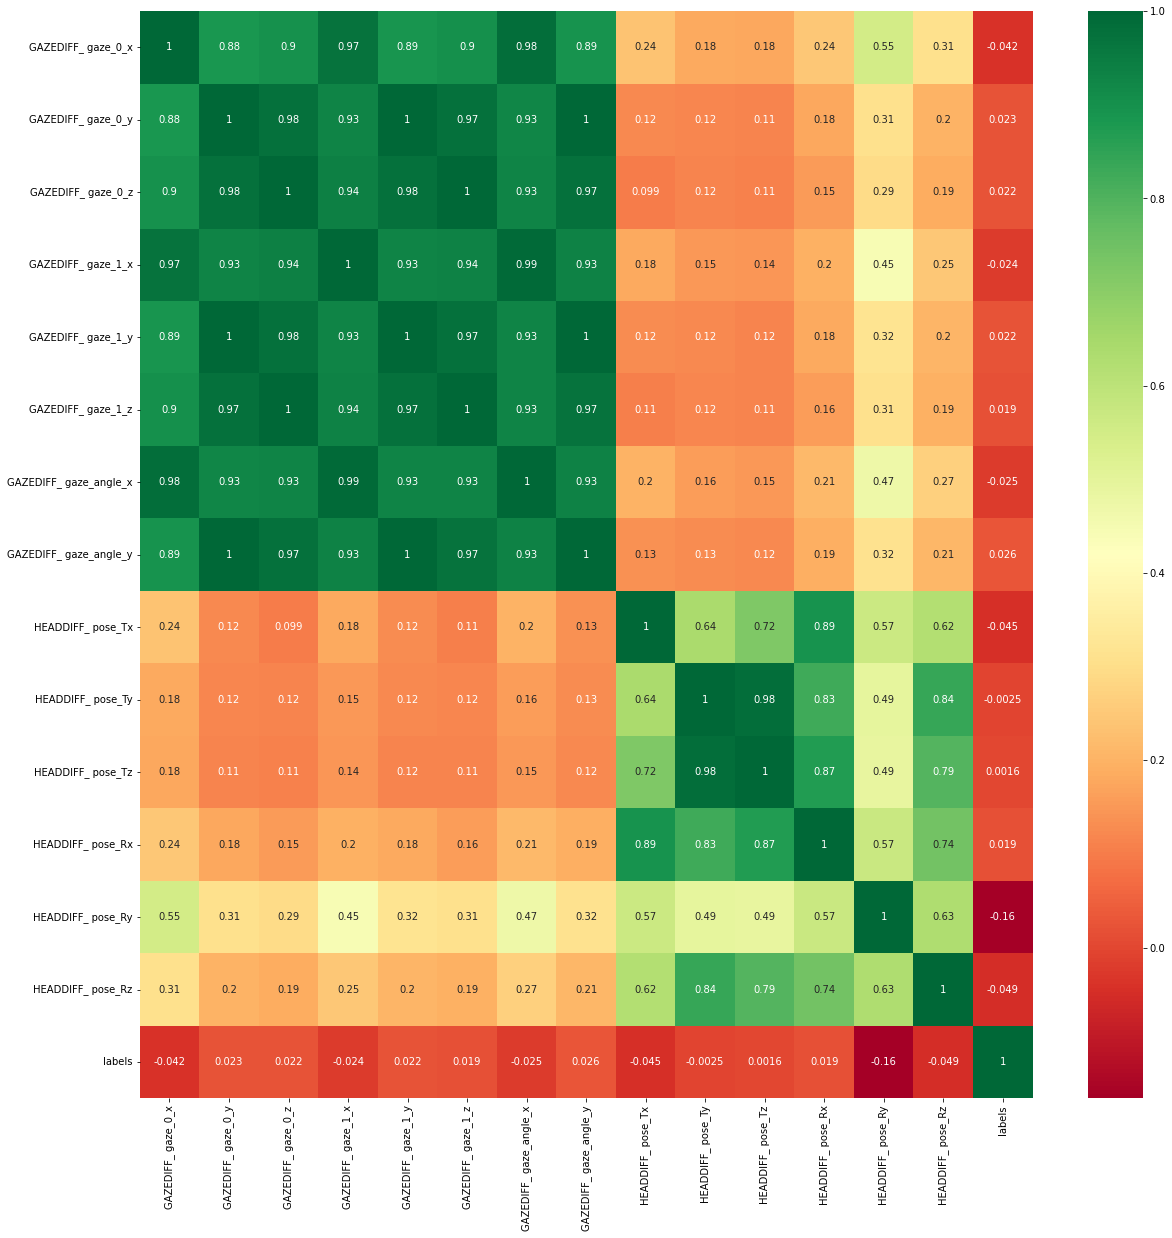

In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")